In [1]:
import glob
import os
import shutil
from tqdm.auto import tqdm

In [2]:
folder_list = glob.glob('../data/2021-02-16-1day-299/input/**', recursive=True)

In [11]:
dst = '../data/crawling/'
os.makedirs(dst, exist_ok=True)

for path in tqdm(folder_list):
    if os.path.isfile(path):
        shutil.move(path, dst)


In [14]:
len(glob.glob(dst + '/*', recursive=True))

90760

In [276]:
import pandas as pd

In [277]:
test_log = pd.read_csv('../test_logs/test_result')
test_log

,path,target,predict,score
0,data/crawling/148832120_5_1615762396.jpg,-1,0,4.512271e-05
1,data/crawling/148829195_4_1615747796.jpg,-1,0,1.188865e-06
2,data/crawling/148851278_1_1615782245.jpg,-1,1,9.953445e-01
3,data/crawling/148868393_4_1615806603.jpg,-1,0,5.000138e-05
4,data/crawling/148821928_5_1615735703.jpg,-1,0,1.463576e-07
...,...,...,...,...
90755,data/crawling/148870426_4_1615794715.jpg,-1,0,7.627419e-08
90756,data/crawling/148866919_12_1615792519.jpg,-1,0,4.153831e-02
90757,data/crawling/148861194_8_1615788917.jpg,-1,0,4.028925e-03
90758,data/crawling/148837747_2_1615771293.jpg,-1,0,4.385173e-04


In [278]:
true_path = test_log[test_log.predict == 1]['path'].tolist()
false_path = test_log[test_log.predict == 0]['path'].tolist()

print(f"true_size : {len(true_path)}, false_size : {len(false_path)}")

true_size : 8167, false_size : 82593


In [280]:
dst = 'test_dummy/'
os.makedirs(dst, exist_ok=True)

for path in true_path[:10000]:
    p = '../' + path
    shutil.copy(p, dst)
    

In [41]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [42]:
test_log = pd.read_csv('../test_logs/test_result')
test_log

,path,target,predict,score
0,data/not-safe-singleavg/0.93-136493588_2_16038...,1,1,9.885875e-01
1,data/not-safe-singleavg/0.63-118577693_4_15832...,1,1,9.999999e-01
2,data/not-safe-singleavg/0.85-122416124_3_15888...,1,1,1.000000e+00
3,data/not-safe-singleavg/0.81-127039739_8_15994...,1,1,9.999961e-01
4,data/not-safe-singleavg/0.57-120513813_7_15877...,1,0,2.949980e-08
...,...,...,...,...
14758,data/not-safe-singleavg/0.78-131009355_2_16082...,1,0,3.520928e-01
14759,data/safe/0.15-142650119_1_1609950080.jpg,0,0,4.151266e-09
14760,data/safe/0.0-142647486_4_1609947321.jpg,0,0,5.383461e-05
14761,data/safe/0.05-142647002_10_1609946704.jpg,0,0,4.920127e-03


In [43]:
test_log[test_log.target != test_log.predict]

,path,target,predict,score
4,data/not-safe-singleavg/0.57-120513813_7_15877...,1,0,2.949980e-08
48,data/not-safe-singleavg/0.97-133591613_6_16069...,1,0,4.037278e-02
57,data/not-safe-singleavg/0.9-134843923_7_160521...,1,0,8.741311e-04
80,data/safe/0.13-142649824_9_1609949381.jpg,0,1,9.997407e-01
113,data/not-safe-singleavg/0.97-120791163_1_15854...,1,0,1.815817e-03
...,...,...,...,...
14700,data/not-safe-singleavg/0.82-140287436_7_16078...,1,0,1.214197e-01
14721,data/not-safe-singleavg/0.69-134848733_8_16058...,1,0,3.820316e-05
14725,data/safe/0.14-142650886_5_1609950571.jpg,0,1,8.569319e-01
14753,data/safe/0.33-142645579_1_1609945563.jpg,0,1,9.998028e-01


In [45]:
confusion_matrix(test_log['target'], test_log['predict'])

array([[6914,  376],
       [ 469, 7004]])

In [46]:
test_log[(test_log.target==0)&(test_log.predict==1)]

,path,target,predict,score
80,data/safe/0.13-142649824_9_1609949381.jpg,0,1,0.999741
145,data/safe/0.34-142653294_2_1609953772.jpg,0,1,0.996200
163,data/safe/0.36-142647267_1_1609947029.jpg,0,1,0.814942
201,data/safe/0.3-142646735_9_1609946487.jpg,0,1,0.999821
207,data/safe/0.43-142646102_1_1609945963.jpg,0,1,0.848566
...,...,...,...,...
14486,data/safe/0.01-142651435_3_1609951191.jpg,0,1,0.999160
14547,data/safe/0.07-142653458_1_1609954144.jpg,0,1,0.999239
14583,data/safe/0.14-142648527_5_1609948150.jpg,0,1,0.751859
14725,data/safe/0.14-142650886_5_1609950571.jpg,0,1,0.856932


In [20]:
test_log.to_csv("test_log.csv", index=False)

In [47]:
from PIL import Image

In [116]:
def show_me_image():
    for file in test_log[(test_log.target==1)&(test_log.predict==0)].path:
        data_src = '../'
        img = Image.open(data_src + file)

        yield img

In [117]:
a = show_me_image()

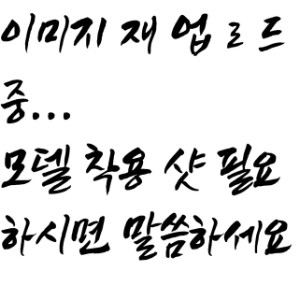

In [274]:
next(a)

In [17]:
import shutil
data_src = '../'
for row in test_log.values:
    if (row[1], row[2]) == (1, 0):
        shutil.copy2(data_src + row[0], "FP/")
    elif (row[1], row[2]) == (0, 1):
        shutil.copy2(data_src + row[0], "FN/")


In [18]:
len(os.listdir('./FN'))

583

In [19]:
len(os.listdir('./FP'))

147